# Project: Titanic - ML from Disaster

# Table of Contents

* [1. Loading the Data](#loading-data)
* [2. Exploratory Data Analysis (EDA)](#eda)
* [3. Feature Engineering & Data Wrangling](#fe-dw)
* [4. Model Training](#model-training) 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [154]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [155]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [156]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
train_df.set_index(train_df.PassengerId, inplace=True) # sửa chỉ số 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
train_df.drop('PassengerId', axis=1, inplace=True) # Bỏ cái trùng lặp
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [159]:
# Cách 2 : dùng tương tự như House Price

## 1. Feature Classification: Categorical vs Numerical

* Điều này giúp chúng ta lựa chọn biểu đồ phù hợp cho việc trực quan hóa dữ liệu.

#### Which features are categorical?
* Categorical Features: nominal, ordinal, ratio, interval (danh nghĩa, thứ tự, tỷ lệ, khoảng cách)
* Được dùng để phân loại các mẫu dữ liệu vào các tập hợp mẫu tương tự nhau.
  
#### Which features are numerical?

* Numerical features: discrete, continuous, or timeseries (rời rạc, liên tục hoặc chuỗi thời gian)
* Những giá trị này thay đổi từ mẫu này sang mẫu khác.

In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
* Numerical: (continuous) Age, Fare, (discrete: rời )
* Mix types of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

In [161]:
# Chuyển cho đúng kiểu DL để khỏi bị nhầm 
train_df["Survived"] = train_df["Survived"].astype("category")
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [163]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [164]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical feature values across the samples

In [165]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Numerical feature 

In [166]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2. Exploratory Data Analysis (EDA) : Phân tích khám phá dữ liệu

### 2.1: Correlating categorical features
* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch

#### Target Variable: `Survived`

In [167]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [168]:
train_df["Survived"].value_counts(normalize=True).to_frame() # tính %

,proportion
Survived,
0,0.616162
1,0.383838


#### `Sex`


In [169]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


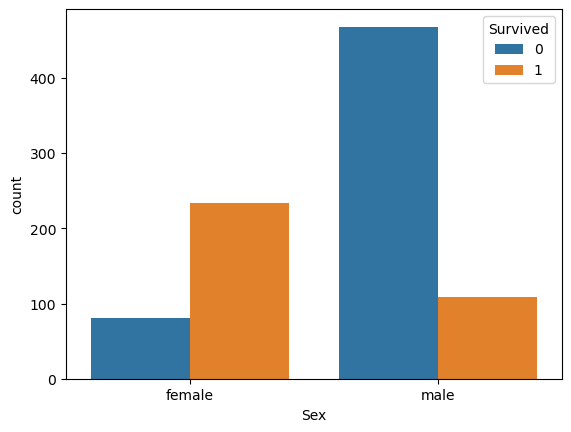

In [170]:
sns.countplot(data=train_df, x='Sex', hue="Survived");

- Remaining Categorical Features Columns

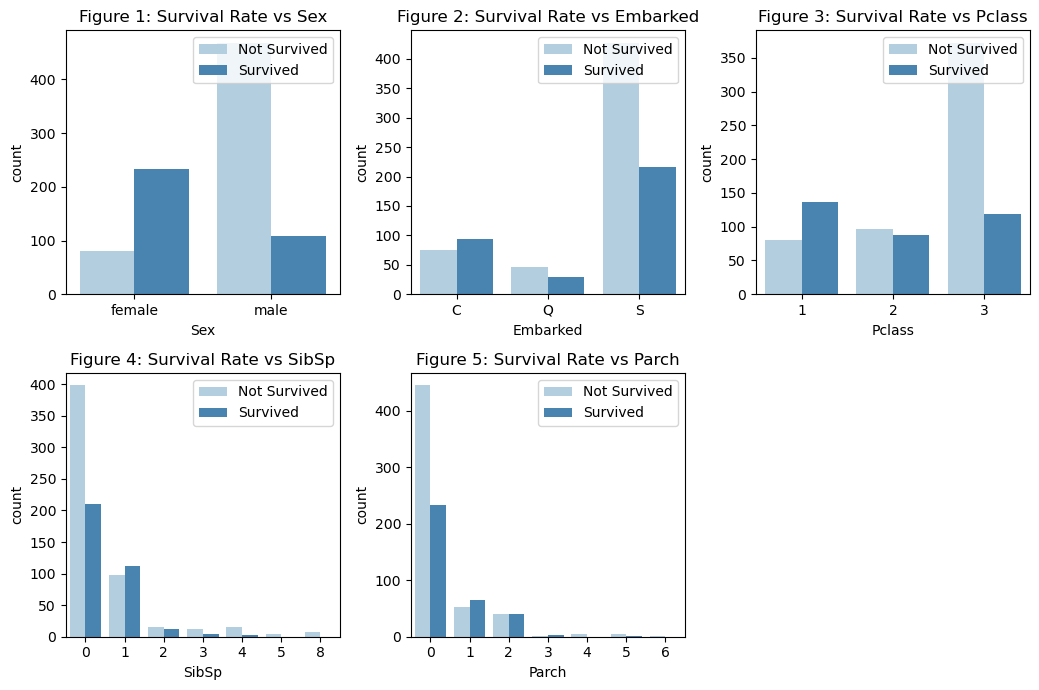

In [171]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']  

n_rows = 2
n_cols = 3 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c  # Chỉ số để duyệt qua danh sách "cols"
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x=cols[i], hue="Survived", palette='Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])  
ax.flat[-1].set_visible(False) # bỏ đi hình thừa(hình 6)
# Tối ưu hóa cách bố trí
plt.tight_layout()
plt.show()  # Hiển thị biểu đồ

## 2.2: EDA for Numerical Features
* Numerical Features: (continuous) `Age`,`Fare`

#### Age

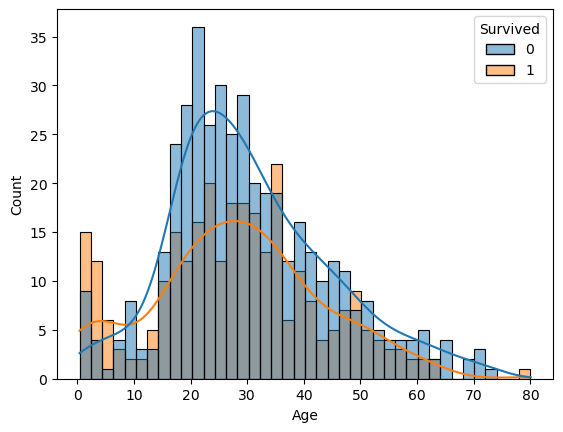

In [172]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins=40, kde=True); # chia thành 40 khoảng, vẽ đường=True

#### Fare

In [173]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

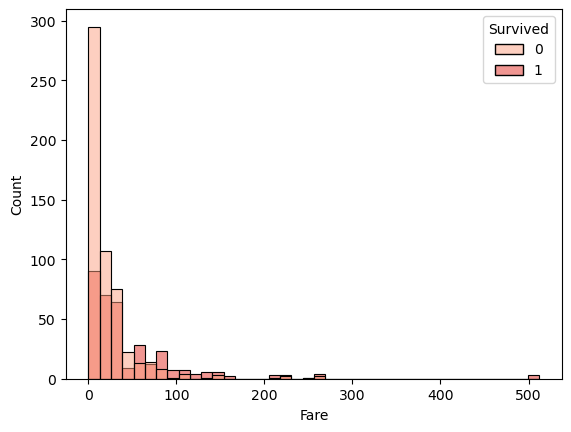

In [174]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=40, palette='Reds')

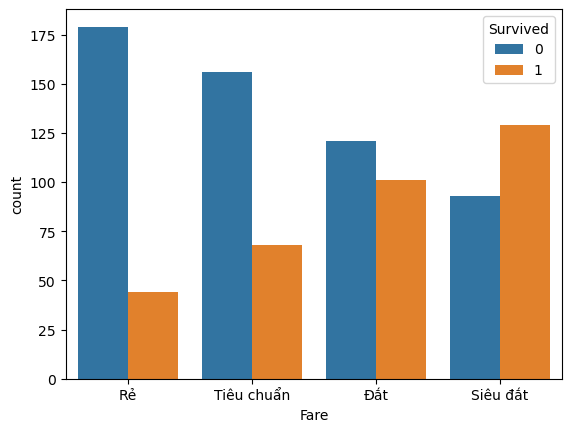

In [175]:
# To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ['Rẻ','Tiêu chuẩn','Đắt','Siêu đắt']
quartile_data = pd.qcut(train_df['Fare'],4, labels=fare_categories) # chia làm 4 khoảng

sns.countplot(x=quartile_data, hue=train_df['Survived']);

In [176]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

# 3. Feature Engineering & Data Wrangling : Kỹ thuật tính năng & Xử lý dữ liệu

## Name
* Regular Expression

In [177]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [178]:
# return sau dấu , trước dấu . : kiểm tra giới tính
import re # regular expression

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [179]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name'] # lọc ra tên có Mrs. Martin

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [180]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [181]:
def group_title(title):
    if title in ['Mr','Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    return "Other"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

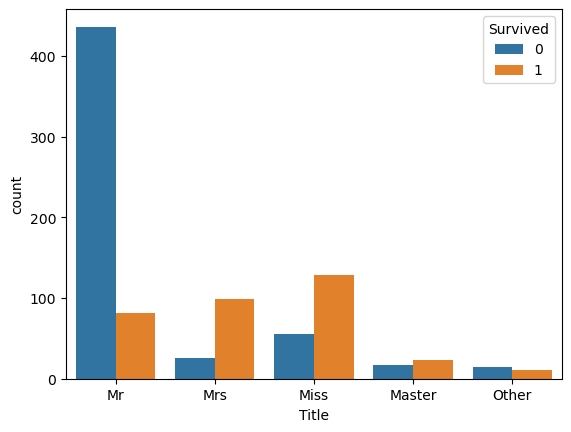

In [182]:
sns.countplot(data=train_df, x='Title', hue="Survived")

## Family
* `SibSp`, `Parch`

In [183]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1 
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1 

In [184]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,11], labels=['Solo','Small','Medium','Large']) # (0,1], (1,4], (4,6], (6,11]
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,11], labels=['Solo','Small','Medium','Large']) # (0,1], (1,4], (4,6], (6,11]

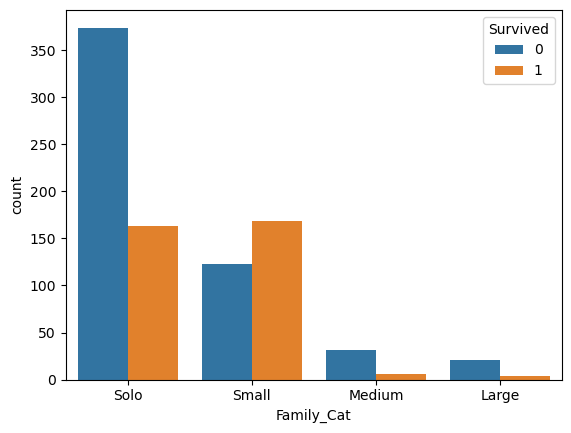

In [185]:
sns.countplot(data=train_df, x='Family_Cat', hue="Survived");

## 4.2 Data Wrangling 

In [186]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [187]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum() # đếm GT null
        if missing_count > 0:
            print(f"{col} has {missing_count *100/ n_rows:.2f}% missing value")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Age has 19.87% missing value
Embarked has 0.22% missing value
Age has 20.57% missing value
Fare has 0.24% missing value


### Filling missing values

#### Age
- Filling missing values with `median` of whole dataset
- 

In [188]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
age_by_sex_pclass

C:\Users\Pham Quang Anh\AppData\Local\Temp\ipykernel_16276\1186517075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [189]:
# Fillng the missing values

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())) # transform thay cho apply
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())) # transform thay cho apply

C:\Users\Pham Quang Anh\AppData\Local\Temp\ipykernel_16276\175884274.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())) # transform thay cho apply
C:\Users\Pham Quang Anh\AppData\Local\Temp\ipykernel_16276\175884274.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median())) # transform thay cho apply


In [190]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22% missing value
Fare has 0.24% missing value


In [191]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [192]:
# preprocess pipeline
from sklearn.pipeline import Pipeline # kết hợp nhiều bước xử lý (transformation) tuần tự với nhau
from sklearn.impute import SimpleImputer # Dùng để điền vào những giá trị bị thiếu trong dữ liệu
from sklearn.compose import ColumnTransformer # áp dụng các quy trình tiền xử lý khác nhau cho các cột dữ liệu khác nhau
from sklearn.preprocessing import OneHotEncoder, # Biến đổi dữ liệu thuộc tính dạng phân loại (categorical) thành dạng nhị phân (one-hot encoding)
StandardScaler # Chuẩn hóa dữ liệu thuộc tính dạng số (numerical) bằng cách loại bỏ trung bình và chia cho độ lệch chuẩn, giúp đưa dữ liệu về cùng một thang đo 

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()) # mean = 0, standard deviation = 1
])
cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [193]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [194]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [195]:
X = preprocessor.transform(X) # X -> X_train, X_val
X_test = preprocessor.transform(X_test)

# 4. Model training

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train

array([[-0.53489116, -0.4969927 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.44277621, -0.48944219,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.10435289, -0.48633742,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.81880212, -0.03431369,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.00845489, -0.48633742,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.02208504, -0.03037132,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [197]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [198]:
X_test.shape

(418, 19)

In [224]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [205]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [206]:
log_reg.score(X_val, y_val) # Accurate

0.8156424581005587

In [207]:
y_pred = log_reg.predict(X_val)

In [208]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8059701492537313, 0.7297297297297297)

In [212]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



- y = a*x1 + b*x2 + bias --> y = a*x1^2 + b*x2^2 + c*x1*x2 + bias

In [220]:
poly = PolynomialFeatures(degree=5) # bậc 
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [222]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [223]:
poly_log_reg.score(poly_features_X_val, y_val)

0.7932960893854749

In [229]:
# Decision Tree

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022) # độ sâu của cây, như random.seed
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [228]:
decision_tree.score(X_val, y_val)

0.8212290502793296

## 4.1 Cross-validation

In [230]:
from sklearn.model_selection import cross_val_score

In [233]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022) # độ sâu của cây, như random.seed

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)
lr_scores.mean(), lr_scores.std() # +-

(0.826031008725127, 0.020466357172416235)

In [234]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)
dt_scores.mean(), dt_scores.std() # +-

(0.8069801016885318, 0.014586754299604428)

## 4.2 Baseline Model Comparision

In [241]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = [
    LinearSVC(random_state=seed), 
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=12000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

In [249]:
# Hàm để tạo kết quả baseline
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # K-fold
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    
    # Vòng lặp qua từng mô hình
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    # Tạo DataFrame kết quả
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    # Tuỳ chọn để vẽ biểu đồ kết quả
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Biểu đồ Boxplot của Độ chính xác mô hình qua 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
        
    # Summary result
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean,std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean','Standard Devitaion']

    # sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_results

# Ví dụ gọi hàm
generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)

C:\Users\Pham Quang Anh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pham Quang Anh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pham Quang Anh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pham Quang Anh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pham Quang Anh\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pham Quang Anh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:59:05

,Mean,Standard Devitaion
model_name,,
SVC,0.836143,0.031097
XGBClassifier,0.831624,0.015685
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.800201,0.019157
DecisionTreeClassifier,0.794608,0.016252
